<a href="https://colab.research.google.com/github/MalikHammad7891/Malikhammad1234567890/blob/main/MalikhammadEDAproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import necessary libraries
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical computations
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns             # For statistical data visualization
from sklearn.decomposition import PCA            # For dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_regression  # For feature selection
from sklearn.preprocessing import StandardScaler  # For data standardization


In [5]:
# Load the dataset from Google Drive
file_path = '/content/dataforeda.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
# Display basic information about the dataset
print("Dataset Information:")
data.info()

# Display statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
data.describe()

# Display summary of categorical columns
print("\nSummary of Categorical Columns:")
data.describe(include=['O'])


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB

Statistical Summary of Numerical Columns:

Summary of Categorical Columns:


,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [11]:
# Check for missing values
print("Missing Values in Each Column:")
print(data.isnull().sum())

# Drop unnecessary columns (if any)
data = data.drop(columns=['Unnamed: 0'])  # Dropping 'Unnamed: 0' as it doesn't add value

# Check for duplicates
print("\nNumber of duplicate rows:", data.duplicated().sum())

# Remove duplicate rows
data = data.drop_duplicates()

# Convert 'Ram' and 'Weight' columns to numeric by removing non-numeric characters
data['Ram'] = data['Ram'].str.replace('GB', '').astype(int)
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)

# Verify the changes
print("\nData Types after Cleaning:")
print(data.dtypes)


Missing Values in Each Column:
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Number of duplicate rows: 29

Data Types after Cleaning:
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object


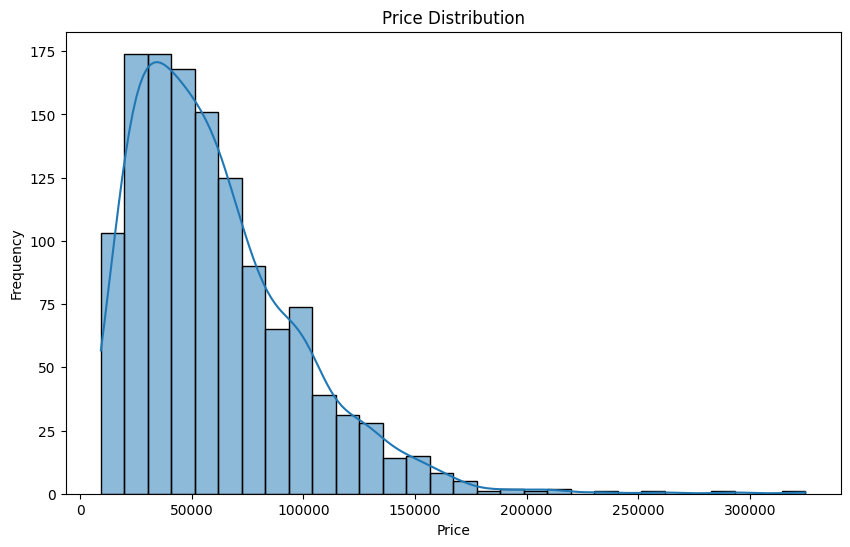

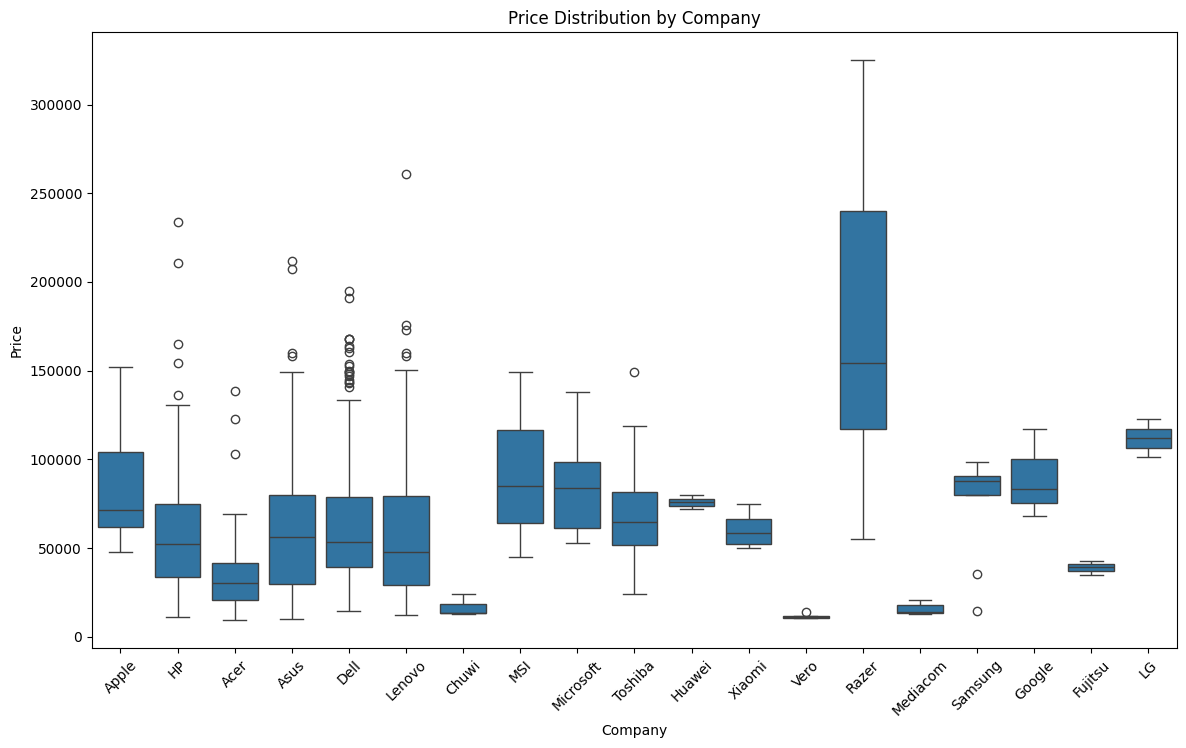

In [12]:
# Histogram of the 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot to show the distribution of prices by 'Company'
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company', y='Price', data=data)
plt.title('Price Distribution by Company')
plt.xticks(rotation=45)
plt.show()


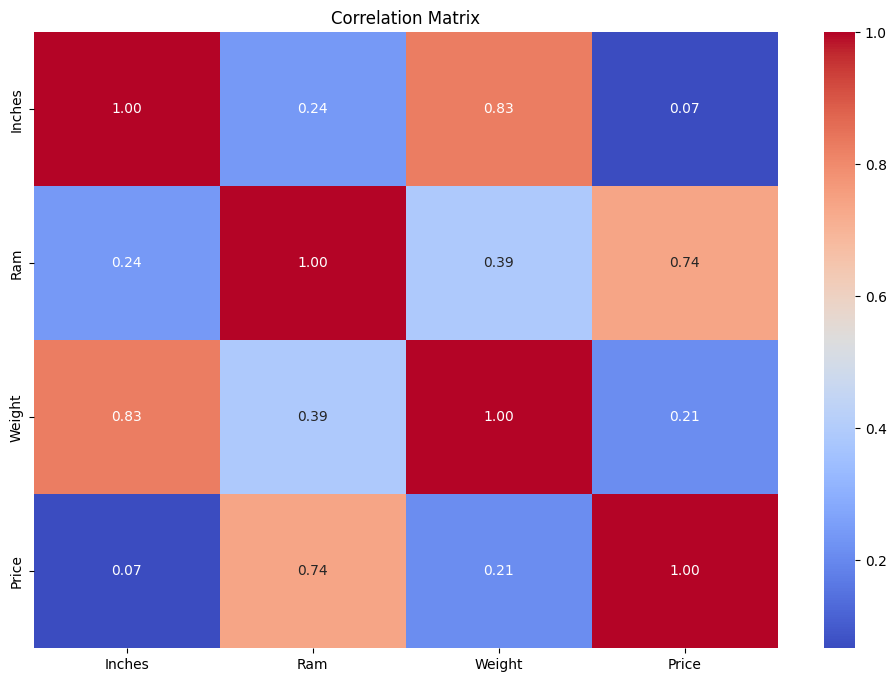

In [14]:
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # This selects columns with numerical data types

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()  # .corr() computes the correlation matrix

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # .heatmap() creates a heatmap, annot=True shows values, cmap sets the color map, fmt formats the numbers
plt.title('Correlation Matrix')  # Add a title to the plot
plt.show()  # Display the plot


In [15]:
# Example Feature Engineering: Extracting screen resolution dimensions
data['Resolution'] = data['ScreenResolution'].str.extract('(\d+x\d+)')
data[['X_res', 'Y_res']] = data['Resolution'].str.split('x', expand=True)
data['X_res'] = data['X_res'].astype(int)
data['Y_res'] = data['Y_res'].astype(int)
data = data.drop(columns=['ScreenResolution', 'Resolution'])

# Creating a new feature: PPI (Pixels Per Inch)
data['PPI'] = ((data['X_res']**2 + data['Y_res']**2)**0.5 / data['Inches']).astype(float)

# Check the new features
data.head()


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,226.983005


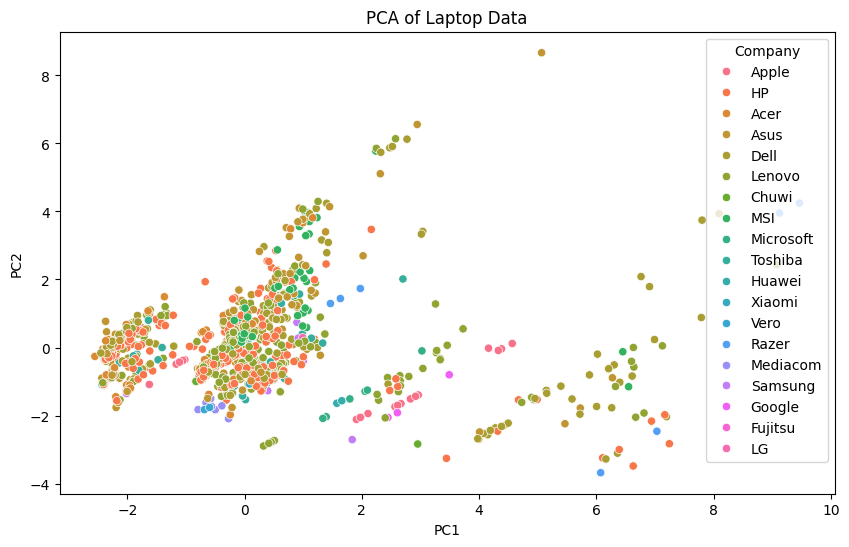

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
features = ['Ram', 'Weight', 'Price', 'X_res', 'Y_res', 'PPI']
x = data[features]
x = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Adding principal components to the data
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

# Plotting the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=data, hue='Company')
plt.title('PCA of Laptop Data')
plt.show()


In [18]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(data.drop(columns=['Price']), drop_first=True)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Target variable
y = data['Price']

# Using SelectKBest to extract the 5 best features
best_features = SelectKBest(score_func=f_regression, k=5)
fit = best_features.fit(X_scaled, y)

# Get scores of the features
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']  # Naming the dataframe columns

# Print the 5 best features based on scores
print("Best Features Based on Scores:")
print(feature_scores.nlargest(5, 'Score'))


Best Features Based on Scores:
              Feature        Score
6                 PC1  1646.143691
1                 Ram  1540.650752
3               X_res   557.652391
28  TypeName_Notebook   554.838951
4               Y_res   546.248801
